In [29]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import pandas as pd
from pathlib import Path

# Load suburb facilities into a pandas DataFrame
csv_path = Path("Resources/suburbs_facilities.csv")
suburbs_df = pd.read_csv(csv_path)

suburbs_df.head()

,Suburb,Place_id,commercial.shopping_mall,catering,education,entertainment,healthcare,public_transport,office,natural,total
0,Abbotsford,511d4f159df61f6240593efc4685fbe642c0f00101f901...,1,20,4,6,4,20,20,6,81
1,Aberfeldie,5104c2f3f7b71c62405947b30d373be142c0f00101f901...,0,6,4,1,0,0,0,2,13
2,Aintree,51c04b5fbe6b15624059133b641415dc42c0f00101f901...,0,1,2,0,0,19,0,10,32
3,Aireys inlet,5161a5828a6a03624059056ad6be253b43c0f00101f901...,0,6,1,0,1,4,0,20,32
4,Airport west,5195e6a095451c624059cba4e1ef72dc42c0f00101f901...,1,8,3,1,4,20,0,1,38


In [30]:
# Load median house prices into a pandas DataFrame
excel_path = Path("Resources/Suburbs.xlsx")
prices_df = pd.read_excel(excel_path)

prices_df.head()

,Suburbs,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,prelim 2023,change (2021-2022),change(2021-2022),Growth PA
0,ABBOTSFORD,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1365000,1341500,1409000.0,-2.0,88.0,6.5
1,ABERFELDIE,852500,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1858000,1860000,NaN,0.0,118.0,8.1
2,AINTREE,-,-,-,600000,600000,571000,557500,575000,630000,719000,760000,710000.0,6.0,NaN,NaN
3,AIREYS INLET,634000,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1725000,1570000.0,-3.0,172.0,10.5
4,AIRPORT WEST,495000,532000,575000,635000,742000,845000,845000,795000,812500,965000,926500,795000.0,-4.0,87.0,6.5


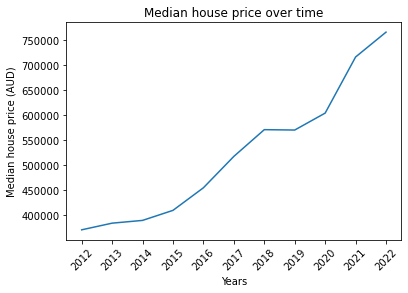

In [31]:
# Create a graph to visualise how median prices have changed through the years
# Convert string to numeric
prices_df[2012] = pd.to_numeric(prices_df[2012], errors='coerce')
prices_df[2013] = pd.to_numeric(prices_df[2013], errors='coerce')
prices_df[2014] = pd.to_numeric(prices_df[2014], errors='coerce')
prices_df[2015] = pd.to_numeric(prices_df[2015], errors='coerce')
prices_df[2016] = pd.to_numeric(prices_df[2016], errors='coerce')
prices_df[2017] = pd.to_numeric(prices_df[2017], errors='coerce')
prices_df[2018] = pd.to_numeric(prices_df[2018], errors='coerce')
prices_df[2019] = pd.to_numeric(prices_df[2019], errors='coerce')
prices_df[2020] = pd.to_numeric(prices_df[2020], errors='coerce')
prices_df[2021] = pd.to_numeric(prices_df[2021], errors='coerce')
prices_df[2022] = pd.to_numeric(prices_df[2022], errors='coerce')

years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
x_axis = np.arange(len(years))

# Find the median price for each year
yearly_median = [prices_df[2012].median(), prices_df[2013].median(), prices_df[2014].median(),
                 prices_df[2015].median(), prices_df[2016].median(), prices_df[2017].median(),
                 prices_df[2018].median(), prices_df[2019].median(), prices_df[2020].median(),
                 prices_df[2021].median(), prices_df[2022].median()]

plt.plot(x_axis, yearly_median)
plt.title("Median house price over time")
plt.xlabel("Years")
plt.ylabel("Median house price (AUD)")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years, rotation=45)
plt.show()

In [32]:
# Create a new Data Frame with just the total number of facilities and 2022 prices
suburbs_df['prices'] = prices_df[2022]

# Drop NA and 0 values 
facilities_df = suburbs_df.loc[(suburbs_df['commercial.shopping_mall'] > 0) &
                                              (suburbs_df['catering'] > 0) &
                                              (suburbs_df['education'] > 0) &
                                              (suburbs_df['entertainment'] > 0) &
                                              (suburbs_df['healthcare'] > 0) &
                                              (suburbs_df['public_transport'] > 0) &
                                              (suburbs_df['office'] > 0) &
                                              (suburbs_df['natural'] > 0) &
                                              (suburbs_df['total'] > 0) &
                                              (suburbs_df['prices'] > 0)]
suburbs_df = suburbs_df.loc[(suburbs_df['total'] > 0) &
                            (suburbs_df['prices'] > 0)]
suburbs_df.dropna(how='all')
facilities_df.dropna(how='all')
suburbs_df.head()

,Suburb,Place_id,commercial.shopping_mall,catering,education,entertainment,healthcare,public_transport,office,natural,total,prices
0,Abbotsford,511d4f159df61f6240593efc4685fbe642c0f00101f901...,1,20,4,6,4,20,20,6,81,1341500.0
1,Aberfeldie,5104c2f3f7b71c62405947b30d373be142c0f00101f901...,0,6,4,1,0,0,0,2,13,1860000.0
2,Aintree,51c04b5fbe6b15624059133b641415dc42c0f00101f901...,0,1,2,0,0,19,0,10,32,760000.0
3,Aireys inlet,5161a5828a6a03624059056ad6be253b43c0f00101f901...,0,6,1,0,1,4,0,20,32,1725000.0
4,Airport west,5195e6a095451c624059cba4e1ef72dc42c0f00101f901...,1,8,3,1,4,20,0,1,38,926500.0


In [33]:
# Print the top five suburbs with the highest median prices for 2022
top_five_prices = prices_df.sort_values(by=2022, ascending=False)
top_five_prices = top_five_prices.iloc[:5]
print("The top five suburbs with the highest median prices for 2022 are: ")
for index, row in top_five_prices.iterrows():
    print(f"{row['Suburbs'].lower().capitalize()} with a median price of {row[2022]}")

print(f"The median price overall was {prices_df[2022].median()}")

The top five suburbs with the highest median prices for 2022 are: 
Toorak with a median price of 6200000.0
Portsea with a median price of 3850000.0
Canterbury with a median price of 3490000.0
Brighton with a median price of 3450000.0
Flinders with a median price of 3342000.0
The median price overall was 765000.0


In [34]:
# Print the top five suburbs with the most total facilities
top_five_facilities = suburbs_df.sort_values(by='total', ascending=False)
top_five_facilities = top_five_facilities.iloc[:5]
print("The top five suburbs with the most total facilities are: ")
for index, row in top_five_facilities.iterrows():
    print(f"{row['Suburb']} with {row['total']} facilities")

print(f"The average number of facilities was {suburbs_df['total'].mean()}")

The top five suburbs with the most total facilities are: 
Westgarth with 160 facilities
Garden city with 155 facilities
Coburg east with 153 facilities
Kew north with 150 facilities
Syndal with 148 facilities
The average number of facilities was 47.765776699029125


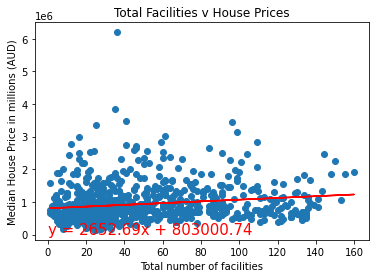

The correlation coefficient between house prices and the total number of facilities is 0.16 (slightly positive; very weak)


In [35]:
# Generate a scatter plot of total no. of facilities vs. median house prices
x_axis = suburbs_df["total"]
y_axis = suburbs_df["prices"]

# Calculate the correlation coefficient and a linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")

# Display line
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Add title and axis labels
plt.title("Total Facilities v House Prices")
plt.xlabel("Total number of facilities")
plt.ylabel("Median House Price in millions (AUD)")

# Show plot and correlation coefficient
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(x_axis, y_axis)[0],2)} (slightly positive; very weak)")

In [9]:
# Conduct an independent t-test for median prices and total number of facilities
stats.ttest_ind(suburbs_df["total"], suburbs_df["prices"], equal_var=False)

Ttest_indResult(statistic=-46.10348584365571, pvalue=2.87896059885677e-230)

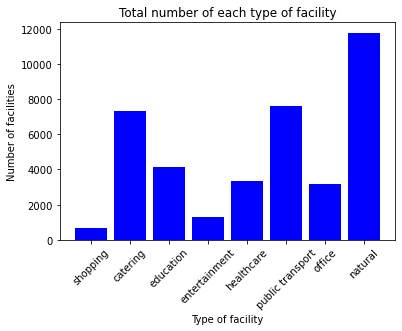

Highest: natural
Lowest: shopping


In [10]:
# Compare the total number of each type of facility
facilities_total = [suburbs_df['commercial.shopping_mall'].sum(),
                    suburbs_df['catering'].sum(),
                    suburbs_df['education'].sum(),
                    suburbs_df['entertainment'].sum(),
                    suburbs_df['healthcare'].sum(),
                    suburbs_df['public_transport'].sum(),
                    suburbs_df['office'].sum(),
                    suburbs_df['natural'].sum()]

facilities = ['shopping', 'catering', 'education', 'entertainment',
              'healthcare', 'public transport', 'office', 'natural']
x_axis = np.arange(len(facilities))
plt.bar(x_axis, facilities_total, color="b")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, facilities, rotation=45)
plt.xlabel("Type of facility")
plt.ylabel("Number of facilities")
plt.title("Total number of each type of facility")
plt.show()
print("Highest: natural")
print("Lowest: shopping")

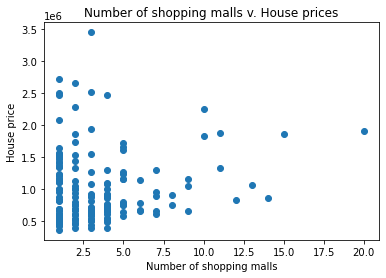

The correlation coefficient between house prices and the total number of facilities is 0.11 (slightly positive; very weak)


In [10]:
# Create a scatter plot for each type of facility and calculate correlation
shopping_mall_x = facilities_df['commercial.shopping_mall']
catering_x = facilities_df['catering']
education_x = facilities_df['education']
entertainment_x = facilities_df['entertainment']
healthcare_x = facilities_df['healthcare']
public_transport_x = facilities_df['public_transport']
office_x = facilities_df['office']
natural_x = facilities_df['natural']

y = facilities_df['prices']

plt.scatter(shopping_mall_x, y)
plt.title("Number of shopping malls v. House prices")
plt.xlabel("Number of shopping malls")
plt.ylabel("House price")
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(shopping_mall_x, y)[0],2)} (slightly positive; very weak)")

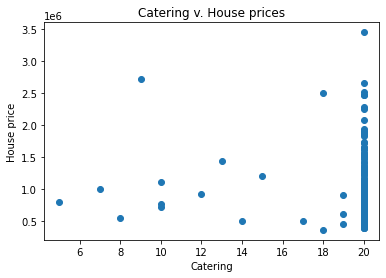

The correlation coefficient between house prices and the total number of facilities is -0.02 (slightly negative; negligible)


In [11]:
plt.scatter(catering_x, y)
plt.title("Catering v. House prices")
plt.xlabel("Catering")
plt.ylabel("House price")
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(catering_x, y)[0],2)} (slightly negative; negligible)")

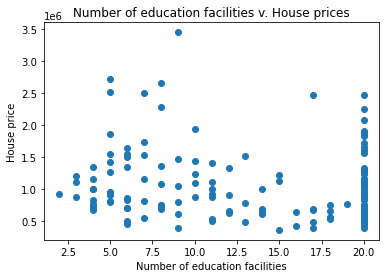

The correlation coefficient between house prices and the total number of facilities is -0.2 (slightly negative; very weak)


In [12]:
plt.scatter(education_x, y)
plt.title("Number of education facilities v. House prices")
plt.xlabel("Number of education facilities")
plt.ylabel("House price")
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(education_x, y)[0],2)} (slightly negative; very weak)")

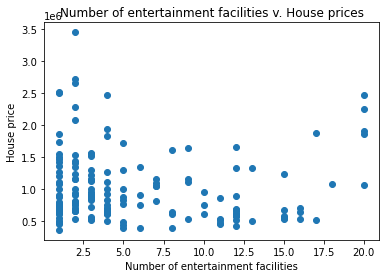

The correlation coefficient between house prices and the total number of facilities is -0.05 (slightly negative; negligible)


In [13]:
plt.scatter(entertainment_x, y)
plt.title("Number of entertainment facilities v. House prices")
plt.xlabel("Number of entertainment facilities")
plt.ylabel("House price")
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(entertainment_x, y)[0],2)} (slightly negative; negligible)")

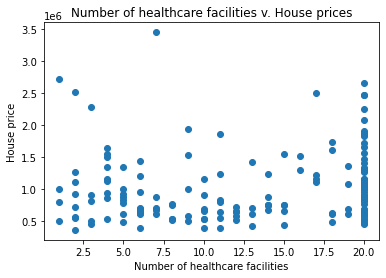

The correlation coefficient between house prices and the total number of facilities is 0.13 (slightly positive; very weak)


In [14]:
plt.scatter(healthcare_x, y)
plt.title("Number of healthcare facilities v. House prices")
plt.xlabel("Number of healthcare facilities")
plt.ylabel("House price")
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(healthcare_x, y)[0],2)} (slightly positive; very weak)")

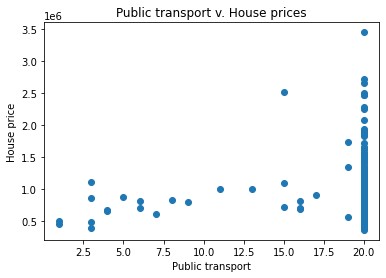

The correlation coefficient between house prices and the total number of facilities is 0.18 (slightly positive; very weak)


In [15]:
plt.scatter(public_transport_x, y)
plt.title("Public transport v. House prices")
plt.xlabel("Public transport")
plt.ylabel("House price")
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(public_transport_x, y)[0],2)} (slightly positive; very weak)")

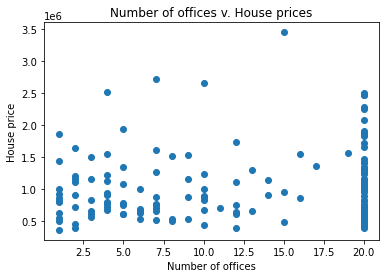

The correlation coefficient between house prices and the total number of facilities is 0.08 (slightly positive; negligible)


In [16]:
plt.scatter(office_x, y)
plt.title("Number of offices v. House prices")
plt.xlabel("Number of offices")
plt.ylabel("House price")
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(office_x, y)[0],2)} (slightly positive; negligible)")

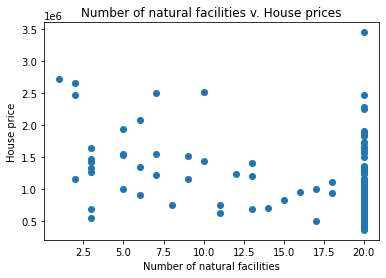

The correlation coefficient between house prices and the total number of facilities is -0.41 (negative; weak)


In [17]:
plt.scatter(natural_x, y)
plt.title("Number of natural facilities v. House prices")
plt.xlabel("Number of natural facilities")
plt.ylabel("House price")
plt.show()
print(f"The correlation coefficient between house prices and the total number of facilities is {round(st.pearsonr(natural_x, y)[0],2)} (negative; weak)")